# __CMPE 255 Final Project__
### __Song Year Prediction__

_Dataset Name_: YearPredictionMSD

_Dataset link_: https://archive.ics.uci.edu/ml/datasets/YearPredictionMSD

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from numpy import loadtxt
import matplotlib.pyplot as plt

In [2]:
#Mount Drive to access training data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/MyDrive/2022 Fall/CMPE 255/Project/YearPredictionMSD.txt'
traindata = pd.read_csv(path,header=None)
#Convert dataset to pandas dataframe
train_df = pd.DataFrame(data = traindata)

In [ ]:
train_df.info()

In [ ]:
#Drop duplicate values
train_df = train_df.drop_duplicates()
print("New dataset shape : " + str(train_df.shape))

New dataset shape : (515131, 91)


Text(0.5, 0, 'Year')

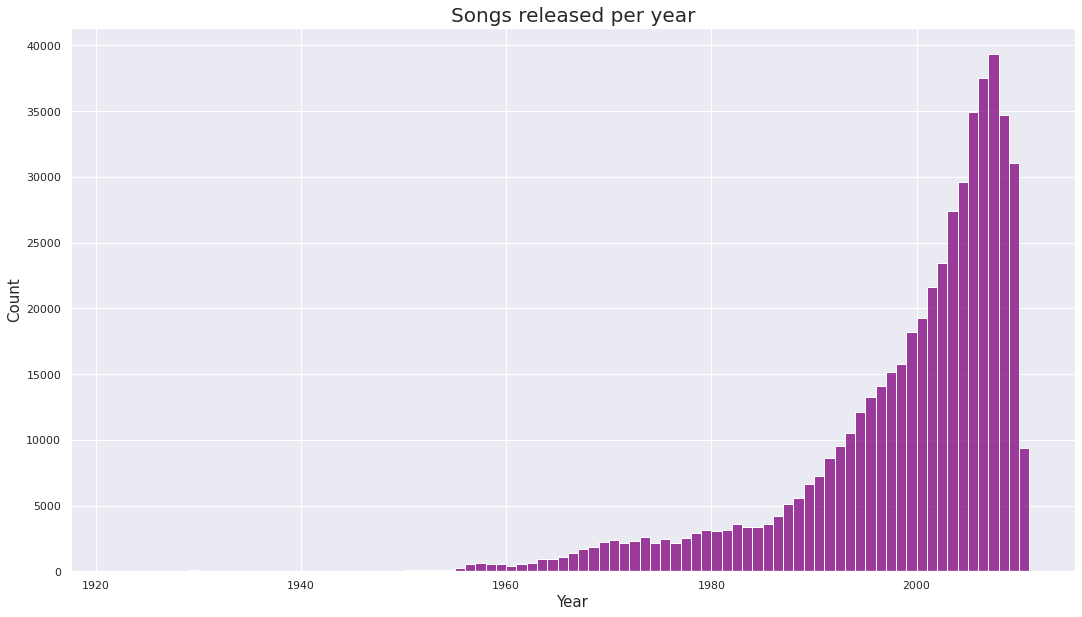

In [ ]:
#Exploratory data analysis

sns.set(rc = {'figure.figsize':(18,10)})
ax=sns.histplot(train_df[0], binwidth=1, color = "Purple")
plt.title('Songs released per year', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Year', fontsize=15)

In [ ]:
#Split label from dataset
label_df = train_df[0]
train_df = train_df.drop(columns=0)
# train_df = train_df.drop(train_df.columns[12:],axis = 1)

In [ ]:
train_df.head()

In [ ]:
label_df.head()

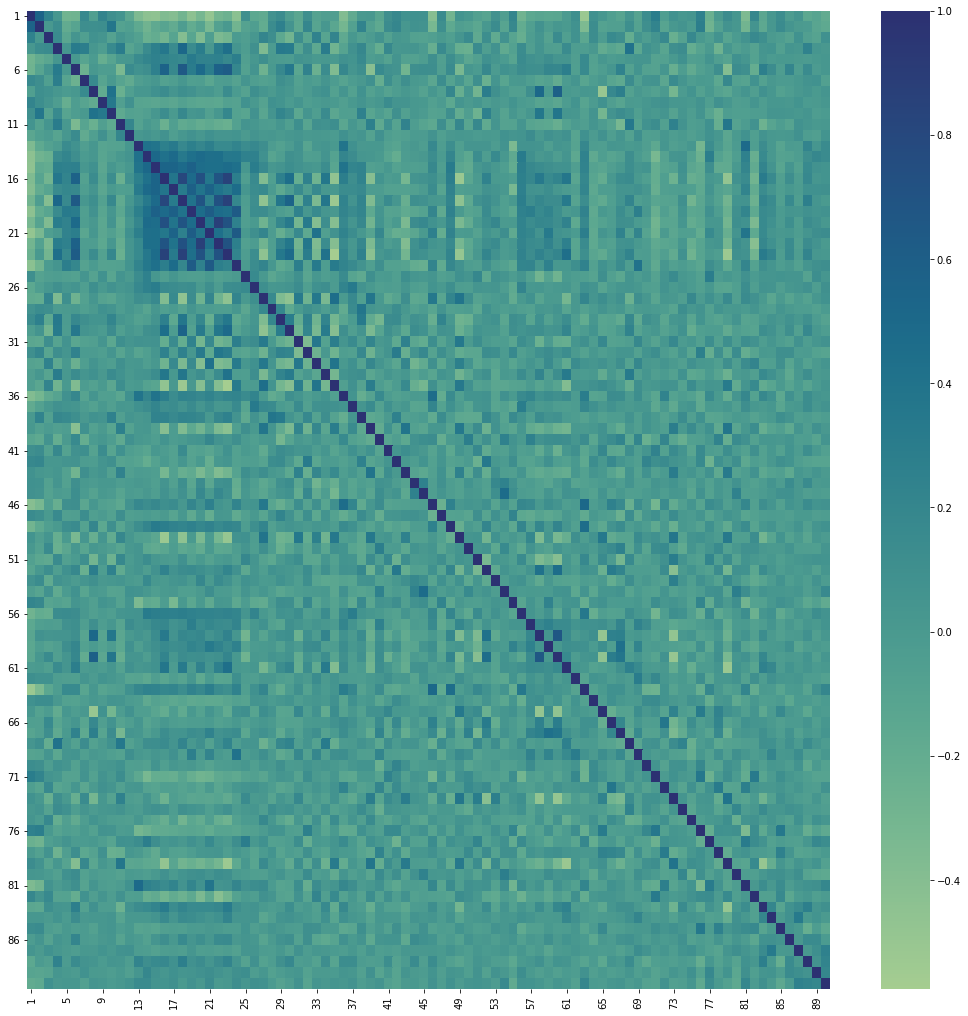

In [ ]:
#Correlation plot

cormat = train_df.corr()
sns.heatmap(cormat, annot=False, cmap="crest")
fig=plt.gcf()
fig.set_size_inches(18,18)
plt.show()

In [ ]:
# #Check missing values
missingvalues = train_df.isnull().values.any()
print("Dataset has missing values: " + str(missingvalues))

Dataset has missing values: False


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#Dataset test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, label_df, test_size=0.10018531276, random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)
col = X_test.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)

In [ ]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(X_train,columns=col)
X_test = pd.DataFrame(X_test,columns=col)

## __Decision Tree Classifier__
_Training Time: 5 minutes_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
knn = DecisionTreeClassifier()
# Train the model
knn.fit(X_train, y_train)
label = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(label, y_test)

0.06487240597570192

## __Logistic Regression__
_Training Time: 6 minutes_

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Train the model
lr.fit(X_train, y_train)
label = knn.predict(X_test)

In [ ]:
accuracy_score(label, y_test)

0.09035245790462904

## __Naive Bayes__
_Training Time: less than 1 minutes_

In [ ]:
from sklearn.naive_bayes import GaussianNB
knn = GaussianNB()
# Train the model
knn.fit(X_train, y_train)
label = knn.predict(X_test)

In [ ]:
accuracy_score(label, y_test)

0.03274622643337402

__Attempt to improve the accuracy score by choosing a subset of provided dataset__

In [ ]:
#Convert dataset to pandas dataframe
train_df = pd.DataFrame(data = traindata)

In [ ]:
new_df = train_df[train_df[0] > 1959] 
new_df = new_df[new_df[0] < 1971]

In [ ]:
new_df.shape

(14088, 91)

In [ ]:
#Drop duplicate values
new_df = new_df.drop_duplicates()
print("New dataset shape : " + str(new_df.shape))

New dataset shape : (14085, 91)


In [ ]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
547,1970,37.06180,-25.41404,15.75938,-17.33834,-23.98347,-13.15467,-5.96742,5.84869,0.37216,...,125.52292,-7.46825,-0.85142,-88.67144,4.95168,-230.42417,-384.76674,40.79830,-664.03437,23.00403
548,1970,46.23140,-5.01131,-13.27325,-8.70860,-0.19686,-14.60078,12.59475,11.16135,17.45844,...,2.84807,215.29568,49.87546,38.45551,5.59635,36.24436,-185.66100,7.75918,-11.64638,-9.42194
549,1970,47.41577,17.78488,75.13696,10.75538,-27.08979,-12.98480,12.84978,4.97273,1.94036,...,-17.76279,124.80195,164.69324,-13.04129,-5.12927,10.81425,34.38429,1.66481,-130.06016,11.13758
550,1970,42.04345,-69.75950,5.79738,11.70301,9.27353,-11.31375,12.74007,3.50382,4.99505,...,-9.22872,-32.54134,-50.27911,3.03472,-18.86966,157.57094,-193.63831,7.87707,181.76498,15.11449
551,1970,44.65584,-22.87195,-16.50629,4.40519,4.08893,-4.89611,12.55139,3.72788,6.44921,...,-9.34985,351.45793,15.63323,5.25392,36.53741,13.04946,-95.06585,5.58056,25.04600,-4.41339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515221,1964,35.53962,-50.56972,24.60423,-4.55219,12.24629,26.23940,-37.77217,-0.53685,6.51877,...,50.75465,-451.85621,103.64699,-26.73457,-23.48787,-256.50982,-116.89150,-16.14270,171.29348,17.91294
515223,1964,37.42420,-4.04763,-11.53687,-0.34937,19.46295,22.24808,-11.03781,-5.53081,38.40369,...,-11.27050,-164.61297,52.85313,-65.05710,2.64351,30.71996,38.66844,-5.46660,-8.32215,-5.40493
515224,1964,40.60085,3.76481,18.30044,-0.35825,33.87114,11.79168,-37.74108,-5.95639,27.96954,...,-13.15003,-103.64238,-54.25277,15.61750,-6.84716,32.34940,0.42049,-9.14976,-140.94854,8.13654
515226,1964,37.53012,6.56228,-18.40798,-10.37841,9.79686,5.76645,-18.88636,-1.46535,35.77243,...,-9.38690,-201.63040,-119.27209,40.23059,-10.14069,31.71191,79.05295,-17.10613,-93.88071,5.59196


Text(0.5, 0, 'Year')

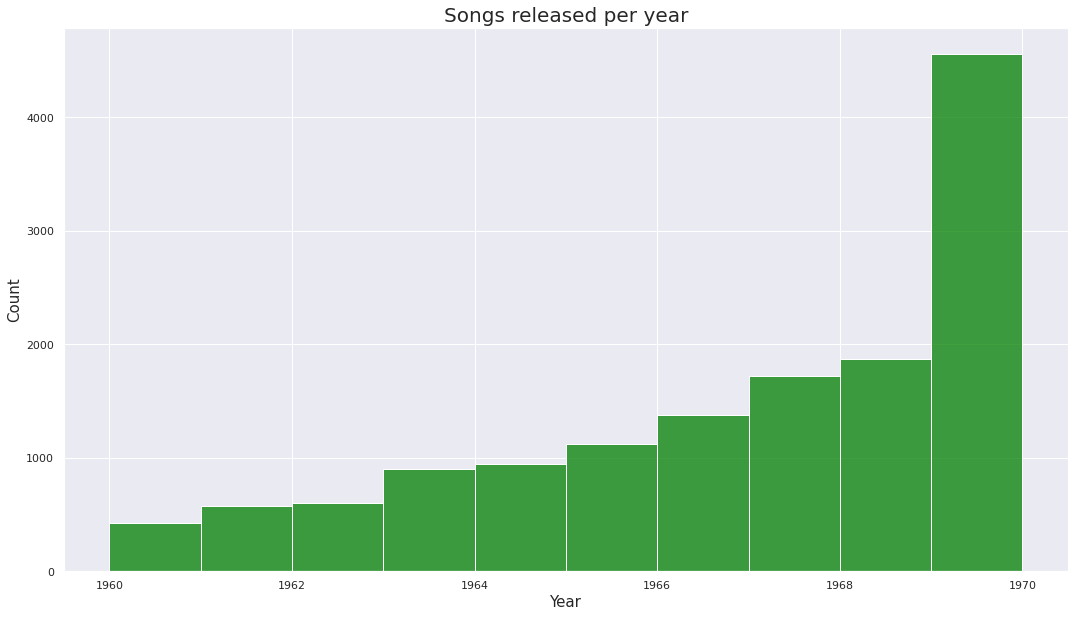

In [ ]:
#Exploratory data analysis

sns.set(rc = {'figure.figsize':(18,10)})
ax=sns.histplot(new_df[0], binwidth=1, color = "Green")
plt.title('Songs released per year', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Year', fontsize=15)

In [ ]:
#Split label from dataset
label_df = new_df[0]
train_df = new_df.drop(columns=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, label_df, test_size=0.1, random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
col = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=col)
col = X_test.columns
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=col)

In [ ]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(X_train,columns=col)
X_test = pd.DataFrame(X_test,columns=col)

## __Random Forest__
_Training Time: less than 1 minutes_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
knn = RandomForestClassifier()
# Train the model
knn.fit(X_train, y_train)
label = knn.predict(X_test)

In [ ]:
accuracy_score(label, y_test)

0.30234208658623135

In [ ]:
# New accuracy score = 31% as compared to 9 percent (best from original dataset)

### __Summary__

* From the Correlation plot we noticed the strong correlation between variables 13 to 24. Therefore, we repeated the steps above with reduced number of variables. However, the accuracy improved only by 2~3 percent.

* In addition, Preprocessing steps such as dimentionality reduction and drop duplicate values also helped increase the accuracy

* Huge improvement in accuracy score noticed with subset of original dataset